In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
data["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [11]:
print('The highest hypertension was of:',data['hypertension'].max())
print('The lowest hypertension was of:',data['hypertension'].min())
print('The average hypertension in the data:',data['hypertension'].mean())

The highest hypertension was of: 1
The lowest hypertension was of: 0
The average hypertension in the data: 0.0974559686888454


Data Visualization

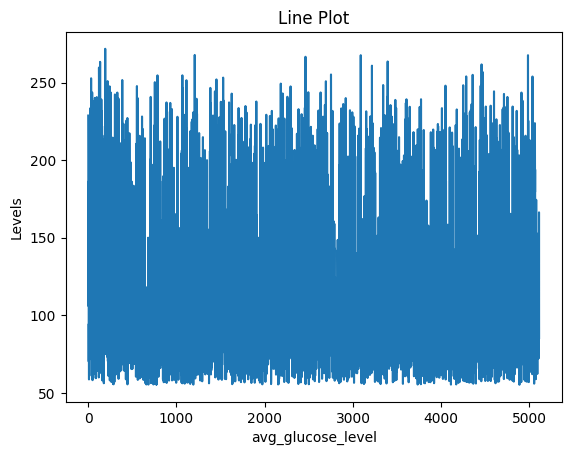

In [12]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(data['avg_glucose_level'])
plt.xlabel("avg_glucose_level")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

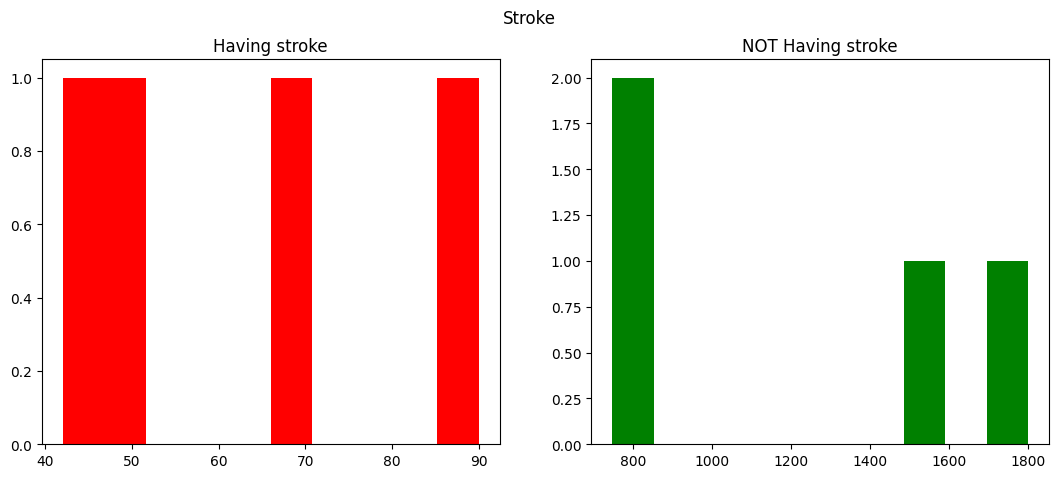

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['stroke']==1]['smoking_status'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having stroke')

data_len=data[data['stroke']==0]['smoking_status'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having stroke')

fig.suptitle('Stroke')
plt.show()

Data Pre-Processing

In [14]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [15]:
newdata=data.drop_duplicates()

In [16]:
newdata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
data.isnull().sum() #checking for total null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
data.avg_glucose_level=data['avg_glucose_level'].astype('int64')
data['bmi'] = data['bmi'].fillna(0).astype('int64')
data.age=data['age'].astype('int64')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228,36,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202,0,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105,32,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1


Normalization

In [19]:
data[1:5]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202,0,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105,32,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1


In [20]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,2:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["age", "hypertension","heart_disease"])
scaled_df.head()

,age,hypertension,heart_disease
0,0.019213,0.000000,0.060193
1,0.017493,0.000000,0.000000
2,0.022941,0.000000,0.060193
3,0.014051,0.000000,0.000000
4,0.022654,0.044811,0.000000


One Hot Encoding



In [21]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['gender','ever_married','Residence_type','work_type','smoking_status']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
encoded_cols=encoded_cols.astype(int)
data = pd.concat([data, encoded_cols], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,1,0,1,1,0,1,0,0,1,0,0
1,51676,61,0,0,202,0,1,0,0,1,0,0,0,1,0,0,1,0
2,31112,80,0,1,105,32,1,1,0,1,0,0,1,0,0,0,1,0
3,60182,49,0,0,171,34,1,0,0,1,1,0,1,0,0,0,0,1
4,1665,79,1,0,174,24,1,0,0,1,0,0,0,1,0,0,1,0


split into train and test in the ration 70:30

In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['stroke']
len(train_X), len(train_Y), len(test_X), len(test_Y)


(3577, 3577, 1533, 1533)

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression is 0.8330071754729289
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1277
           1       0.00      0.00      0.00       256

    accuracy                           0.83      1533
   macro avg       0.42      0.50      0.45      1533
weighted avg       0.69      0.83      0.76      1533



In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)

#Evaluate the model using various metrices
mse = mean_squared_error(test_Y, prediction)
rmse = mean_squared_error(test_Y, prediction, squared=False) #Calculate the square root of MSE
mae = mean_absolute_error(test_Y, prediction)
r_squared=r2_score(test_Y, prediction)

print('Mean squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('Mean Absolute Error:',mae)
print('R-squared:',r_squared)

The accuracy of Linear Regression is: 0.8369210697977821
Mean squared Error: 0.08740637897910106
Root Mean Squared Error: 0.2956456983943806
Mean Absolute Error: 0.19082641731192662
R-squared: 0.371657296860878
